In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('/content/data2 (1).csv')

In [3]:
data.head()

,Unnamed: 0,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,3185909,239,PAYMENT,5178.72,C458748606,400705.0,395526.28,M2081713572,0.00,0.00,0.0
1,4813277,346,CASH_OUT,101502.44,C2106334167,121325.0,19822.56,C2119834427,0.00,101502.44,0.0
2,3054456,234,CASH_OUT,254682.52,C805633349,8364.0,0.00,C487727361,0.00,254682.52,0.0
3,4288656,307,CASH_OUT,39877.38,C2047427483,8056.0,0.00,C1549347997,3224.48,43101.85,0.0
4,3872767,283,PAYMENT,14713.57,C1379164996,5274.0,0.00,M875825628,0.00,0.00,0.0


In [4]:
data.shape

(8242, 11)

In [5]:
data.isnull().sum().sum()

0

In [6]:
data.keys()

Index(['Unnamed: 0', 'step', 'type', 'amount', 'nameOrig', 'oldbalanceOrig',
       'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest',
       'isFraud'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8242 entries, 0 to 8241
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      8242 non-null   int64  
 1   step            8242 non-null   int64  
 2   type            8242 non-null   object 
 3   amount          8242 non-null   float64
 4   nameOrig        8242 non-null   object 
 5   oldbalanceOrig  8242 non-null   float64
 6   newbalanceOrig  8242 non-null   float64
 7   nameDest        8242 non-null   object 
 8   oldbalanceDest  8242 non-null   float64
 9   newbalanceDest  8242 non-null   float64
 10  isFraud         8242 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 708.4+ KB


In [8]:
data=data.drop(['Unnamed: 0','nameOrig','nameDest'],axis=1)

In [9]:
data.shape

(8242, 8)

In [10]:
data['isFraud'].value_counts()

0.0    4121
1.0    4121
Name: isFraud, dtype: int64

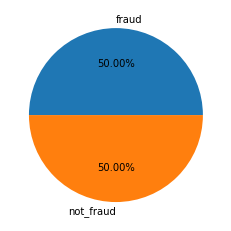

In [11]:
plt.pie(data['isFraud'].value_counts(),labels=['fraud','not_fraud'],autopct='%0.2f%%')
plt.show()

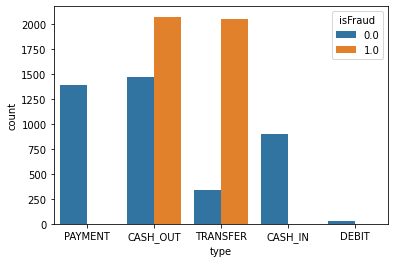

In [12]:
#sns.countplot('isFraud',data=data)
sns.countplot(data=data, x="type", hue="isFraud")
plt.show()

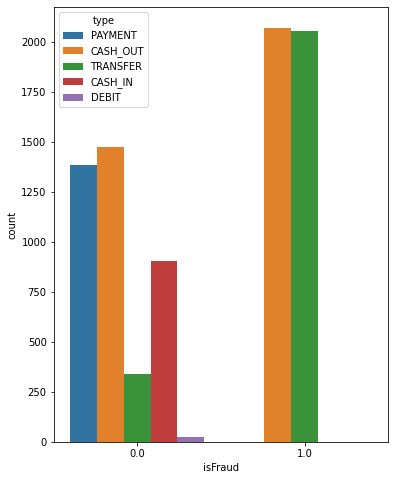

In [13]:
plt.figure(figsize=(6,8))
sns.countplot(data=data, x="isFraud", hue="type")
plt.show()

In [14]:
data.tail()

,step,type,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
8237,369,CASH_OUT,1674146.06,1674146.06,0.0,4728174.27,6402320.34,1.0
8238,369,TRANSFER,231978.48,231978.48,0.0,0.00,0.00,1.0
8239,369,CASH_OUT,231978.48,231978.48,0.0,0.00,231978.48,1.0
8240,369,TRANSFER,89596.79,89596.79,0.0,0.00,0.00,1.0
8241,369,CASH_OUT,89596.79,89596.79,0.0,0.00,89596.79,1.0


In [15]:
data['type'].value_counts()

CASH_OUT    3541
TRANSFER    2388
PAYMENT     1384
CASH_IN      903
DEBIT         26
Name: type, dtype: int64

In [16]:
dict1={'CASH_OUT':0,'TRANSFER':1,'PAYMENT':2,'CASH_IN':3,'DEBIT':4}

In [17]:
data['type']=data['type'].map(dict1)

In [18]:
data.head()

,step,type,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,239,2,5178.72,400705.0,395526.28,0.00,0.00,0.0
1,346,0,101502.44,121325.0,19822.56,0.00,101502.44,0.0
2,234,0,254682.52,8364.0,0.00,0.00,254682.52,0.0
3,307,0,39877.38,8056.0,0.00,3224.48,43101.85,0.0
4,283,2,14713.57,5274.0,0.00,0.00,0.00,0.0


In [19]:
X=data.drop('isFraud',axis=1)

In [20]:
X

,step,type,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest
0,239,2,5178.72,400705.00,395526.28,0.00,0.00
1,346,0,101502.44,121325.00,19822.56,0.00,101502.44
2,234,0,254682.52,8364.00,0.00,0.00,254682.52
3,307,0,39877.38,8056.00,0.00,3224.48,43101.85
4,283,2,14713.57,5274.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...
8237,369,0,1674146.06,1674146.06,0.00,4728174.27,6402320.34
8238,369,1,231978.48,231978.48,0.00,0.00,0.00
8239,369,0,231978.48,231978.48,0.00,0.00,231978.48
8240,369,1,89596.79,89596.79,0.00,0.00,0.00


In [21]:
y=data['isFraud']

In [22]:
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8237    1.0
8238    1.0
8239    1.0
8240    1.0
8241    1.0
Name: isFraud, Length: 8242, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6181, 7)
(2061, 7)
(6181,)
(2061,)


In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
sc=StandardScaler()

In [28]:
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)

In [29]:
X_train_sc

array([[ 0.58881992,  0.0282575 , -0.44288282, ..., -0.20675581,
        -0.32506034, -0.41184116],
       [-1.58424077,  1.96891995, -0.43408653, ...,  2.66949444,
        -0.12545583, -0.25365597],
       [ 0.58881992, -0.94207372, -0.26924374, ..., -0.20675581,
        -0.31261613, -0.29554977],
       ...,
       [-1.18491765,  0.0282575 ,  0.54158377, ..., -0.20675581,
        -0.32506034, -0.41184116],
       [ 0.90456378,  1.96891995, -0.22839638, ...,  1.24830482,
        -0.05801281, -0.31822483],
       [ 0.10591754,  0.99858873, -0.44851029, ..., -0.20675581,
        -0.32506034, -0.41184116]])

In [30]:
X_test_sc

array([[-0.68344211, -0.94207372, -0.43944235, ..., -0.20675581,
         0.00175628, -0.13255146],
       [ 0.38451507,  0.99858873, -0.44866721, ..., -0.16795071,
        -0.32506034, -0.41184116],
       [-0.19125315,  0.0282575 ,  0.0607661 , ..., -0.20675581,
        -0.32506034, -0.41184116],
       ...,
       [ 1.09029546,  0.0282575 , -0.31865369, ..., -0.20675581,
         0.19861267,  0.10328906],
       [-1.63996028, -0.94207372, -0.13891788, ..., -0.20675581,
        -0.10685621,  0.14073742],
       [-1.73282612,  0.0282575 , -0.34979641, ..., -0.20675581,
        -0.32506034, -0.41184116]])

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
model1=LogisticRegression()

In [33]:
model1.fit(X_train_sc,y_train)

LogisticRegression()

In [34]:
y_pred1=model1.predict(X_test_sc)

In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87      1024
         1.0       0.89      0.85      0.87      1037

    accuracy                           0.87      2061
   macro avg       0.87      0.87      0.87      2061
weighted avg       0.87      0.87      0.87      2061



In [37]:
from sklearn.naive_bayes import GaussianNB

In [38]:
model2=GaussianNB()

In [39]:
model2.fit(X_train_sc,y_train)

GaussianNB()

In [40]:
y_pred2=model2.predict(X_test_sc)

In [41]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

         0.0       0.97      0.61      0.75      1024
         1.0       0.72      0.98      0.83      1037

    accuracy                           0.80      2061
   macro avg       0.84      0.79      0.79      2061
weighted avg       0.84      0.80      0.79      2061



In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
model3=KNeighborsClassifier()

In [44]:
model3.fit(X_train_sc,y_train)

KNeighborsClassifier()

In [45]:
y_pred3=model3.predict(X_test_sc)

In [46]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

         0.0       0.89      0.94      0.92      1024
         1.0       0.93      0.89      0.91      1037

    accuracy                           0.91      2061
   macro avg       0.91      0.91      0.91      2061
weighted avg       0.91      0.91      0.91      2061



In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
model4=DecisionTreeClassifier()

In [49]:
model4.fit(X_train_sc,y_train)

DecisionTreeClassifier()

In [50]:
y_pred4=model4.predict(X_test_sc)

In [51]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      1024
         1.0       0.98      0.99      0.99      1037

    accuracy                           0.99      2061
   macro avg       0.99      0.99      0.99      2061
weighted avg       0.99      0.99      0.99      2061



In [52]:

from sklearn import tree

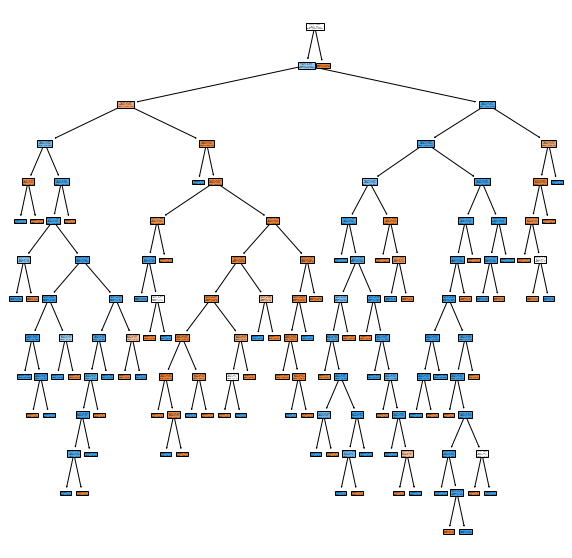

In [53]:
plt.figure(figsize=(10,10))
tree.plot_tree(model4,filled=True)
plt.show()

In [54]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

In [55]:
model5=RandomForestClassifier()

In [56]:
model5.fit(X_train_sc,y_train)

RandomForestClassifier()

In [57]:
y_pred5=model5.predict(X_test_sc)

In [58]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      1024
         1.0       0.99      1.00      0.99      1037

    accuracy                           0.99      2061
   macro avg       0.99      0.99      0.99      2061
weighted avg       0.99      0.99      0.99      2061



In [59]:
model6=AdaBoostClassifier()

In [60]:
model6.fit(X_train_sc,y_train)

AdaBoostClassifier()

In [61]:
y_pred6=model6.predict(X_test_sc)

In [62]:
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      1024
         1.0       0.97      0.99      0.98      1037

    accuracy                           0.98      2061
   macro avg       0.98      0.98      0.98      2061
weighted avg       0.98      0.98      0.98      2061



In [63]:
model5.predict([[239,2,5178.72,400705.00,395526.28,0.00,0.00]])

array([0.])